## Dataset Preparation and Loading

In [1]:
!wget https://github.com/alexeygrigorev/datasets/raw/refs/heads/master/jamb_exam_results.csv

--2024-11-04 18:45:05--  https://github.com/alexeygrigorev/datasets/raw/refs/heads/master/jamb_exam_results.csv
Resolving github.com (github.com)... 20.205.243.166
Connecting to github.com (github.com)|20.205.243.166|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/alexeygrigorev/datasets/refs/heads/master/jamb_exam_results.csv [following]
--2024-11-04 18:45:05--  https://raw.githubusercontent.com/alexeygrigorev/datasets/refs/heads/master/jamb_exam_results.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 391501 (382K) [text/plain]
Saving to: ‘jamb_exam_results.csv.4’

jamb_exam_results.c 100%[===================>] 382.33K  --.-KB/s    in 0.1s    

2024-11-04 18:45:06 (3.40 MB/s) - ‘jamb_exam_

## Loading the Dataset and Preprocessing

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer

# Load the dataset
df = pd.read_csv("jamb_exam_results.csv")

# Lowercase and replace spaces in column names
df.columns = df.columns.str.lower().str.replace(' ', '_')

df.head()

,jamb_score,study_hours_per_week,attendance_rate,teacher_quality,distance_to_school,school_type,school_location,extra_tutorials,access_to_learning_materials,parent_involvement,it_knowledge,student_id,age,gender,socioeconomic_status,parent_education_level,assignments_completed
0,192,22,78,4,12.4,Public,Urban,Yes,Yes,High,Medium,1,17,Male,Low,Tertiary,2
1,207,14,88,4,2.7,Public,Rural,No,Yes,High,High,2,15,Male,High,NaN,1
2,182,29,87,2,9.6,Public,Rural,Yes,Yes,High,Medium,3,20,Female,High,Tertiary,2
3,210,29,99,2,2.6,Public,Urban,No,Yes,Medium,High,4,22,Female,Medium,Tertiary,1
4,199,12,98,3,8.8,Public,Urban,No,Yes,Medium,Medium,5,22,Female,Medium,Tertiary,1


##  Data Cleaning

In [3]:
# Drop the student_id column
df = df.drop(columns=['student_id'])

# Fill missing values with zero
df = df.fillna(0)


## Splitting the Dataset

In [4]:
# Define the target variable and features
target = 'jamb_score'
y = df[target]
X = df.drop(columns=[target])

# Perform the split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=1)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=1)


## Converting to a Dictionary and Vectorizing

In [5]:
# Convert to dictionary format for DictVectorizer
train_dict = X_train.to_dict(orient='records')
val_dict = X_val.to_dict(orient='records')
test_dict = X_test.to_dict(orient='records')

# Initialize DictVectorizer
dv = DictVectorizer(sparse=True)

# Fit and transform the training data
X_train_sparse = dv.fit_transform(train_dict)
X_val_sparse = dv.transform(val_dict)
X_test_sparse = dv.transform(test_dict)


## Question 1

Let's train a decision tree regressor to predict the jamb_score variable.

Train a model with max_depth=1.

Which feature is used for splitting the data?
- study_hours_per_week
- attendance_rate
- teacher_quality
- distance_to_school

In [6]:
from sklearn.tree import DecisionTreeRegressor

# Initialize the DecisionTreeRegressor with max_depth=1
dt = DecisionTreeRegressor(max_depth=1, random_state=1)

# Train the model on the sparse training data
dt.fit(X_train_sparse, y_train)

# Retrieve the feature that the model uses for the first split
split_feature = dv.feature_names_[dt.tree_.feature[0]]
print("Feature used for splitting:", split_feature)


Feature used for splitting: study_hours_per_week


### Answer 1: study_hours_per_week

## Question 2

Train a random forest model with these parameters:
- n_estimators=10
- random_state=1
- n_jobs=-1 (optional - to make training faster)

What's the RMSE of this model on validation?
- 22.13
- 42.13
- 62.13
- 82.12

In [7]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Initialize the RandomForestRegressor with specified parameters
rf = RandomForestRegressor(n_estimators=10, random_state=1, n_jobs=-1)

# Train the model on the sparse training data
rf.fit(X_train_sparse, y_train)

# Make predictions on the validation set
y_pred = rf.predict(X_val_sparse)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
print("RMSE on validation:", rmse)


RMSE on validation: 43.157758977963624


### Answer 2: 42.13

## Question 3

Now let's experiment with the n_estimators parameter
- Try different values of this parameter from 10 to 200 with step 10.
- Set random_state to 1.
- Evaluate the model on the validation dataset.

After which value of n_estimators does RMSE stop improving? Consider 3 decimal places for calculating the answer.
- 10
- 25
- 80
- 200

In [8]:
rmse_values = []
n_estimators_list = range(10, 201, 10)

for n in n_estimators_list:
    # Initialize the RandomForestRegressor with current n_estimators
    rf = RandomForestRegressor(n_estimators=n, random_state=1, n_jobs=-1)
    
    # Train the model on the training data
    rf.fit(X_train_sparse, y_train)
    
    # Predict on the validation data
    y_pred = rf.predict(X_val_sparse)
    
    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    rmse_values.append(rmse)
    
    # Print RMSE for each n_estimators value
    print(f"n_estimators={n}, RMSE={rmse:.3f}")

# Find the point where RMSE stops improving significantly
for i in range(1, len(rmse_values)):
    if abs(rmse_values[i] - rmse_values[i-1]) < 0.001:
        print(f"RMSE stops improving after n_estimators={n_estimators_list[i]}")
        break


n_estimators=10, RMSE=43.158
n_estimators=20, RMSE=41.790
n_estimators=30, RMSE=41.556
n_estimators=40, RMSE=41.076
n_estimators=50, RMSE=40.957
n_estimators=60, RMSE=40.774
n_estimators=70, RMSE=40.588
n_estimators=80, RMSE=40.503
n_estimators=90, RMSE=40.435
n_estimators=100, RMSE=40.365
n_estimators=110, RMSE=40.348
n_estimators=120, RMSE=40.302
n_estimators=130, RMSE=40.286
n_estimators=140, RMSE=40.263
n_estimators=150, RMSE=40.254
n_estimators=160, RMSE=40.200
n_estimators=170, RMSE=40.187
n_estimators=180, RMSE=40.136
n_estimators=190, RMSE=40.152
n_estimators=200, RMSE=40.138


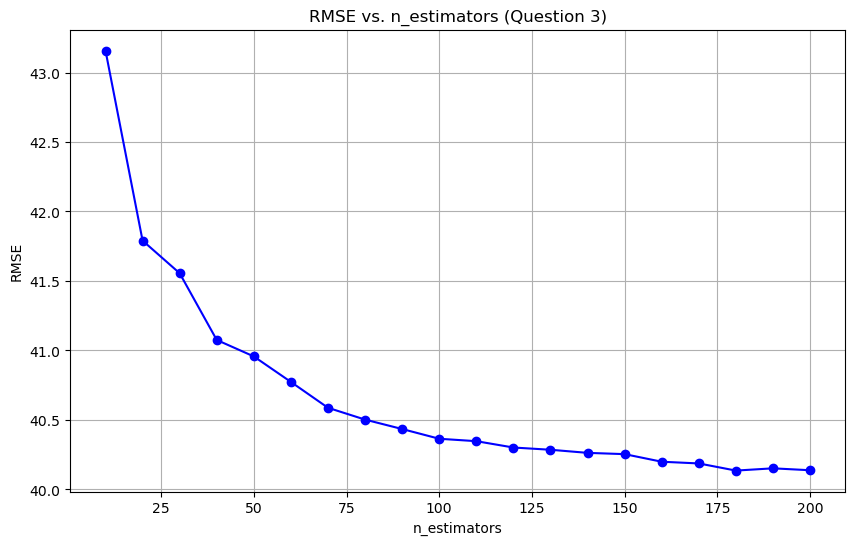

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming `rmse_values` from Question 3 and `n_estimators_list` have been calculated
# Plot for Question 3: RMSE vs. n_estimators
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_list, rmse_values, marker='o', linestyle='-', color='b')
plt.xlabel('n_estimators')
plt.ylabel('RMSE')
plt.title('RMSE vs. n_estimators (Question 3)')
plt.grid(True)
plt.show()


### Answer 3: 200

## Question 4

Let's select the best max_depth:
- Try different values of max_depth: [10, 15, 20, 25]
- For each of these values,
  - try different values of n_estimators from 10 till 200 (with step 10)
  - calculate the mean RMSE
- Fix the random seed: random_state=1

What's the best max_depth, using the mean RMSE?
- 10
- 15
- 20
- 25

In [10]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Define the parameters to test
max_depth_values = [10, 15, 20, 25]
n_estimators_list = range(10, 201, 10)
results = {}

for max_depth in max_depth_values:
    rmse_list = []
    
    for n in n_estimators_list:
        # Initialize the RandomForestRegressor with current max_depth and n_estimators
        rf = RandomForestRegressor(n_estimators=n, max_depth=max_depth, random_state=1, n_jobs=-1)
        
        # Train the model on the training data
        rf.fit(X_train_sparse, y_train)
        
        # Predict on the validation data
        y_pred = rf.predict(X_val_sparse)
        
        # Calculate RMSE and add to list
        rmse = np.sqrt(mean_squared_error(y_val, y_pred))
        rmse_list.append(rmse)
    
    # Calculate mean RMSE for the current max_depth
    mean_rmse = np.mean(rmse_list)
    results[max_depth] = mean_rmse
    print(f"max_depth={max_depth}, mean RMSE={mean_rmse:.3f}")

# Find the best max_depth with the lowest mean RMSE
best_max_depth = min(results, key=results.get)
print(f"Best max_depth based on mean RMSE: {best_max_depth}")


max_depth=10, mean RMSE=40.138
max_depth=15, mean RMSE=40.644
max_depth=20, mean RMSE=40.610
max_depth=25, mean RMSE=40.688
Best max_depth based on mean RMSE: 10


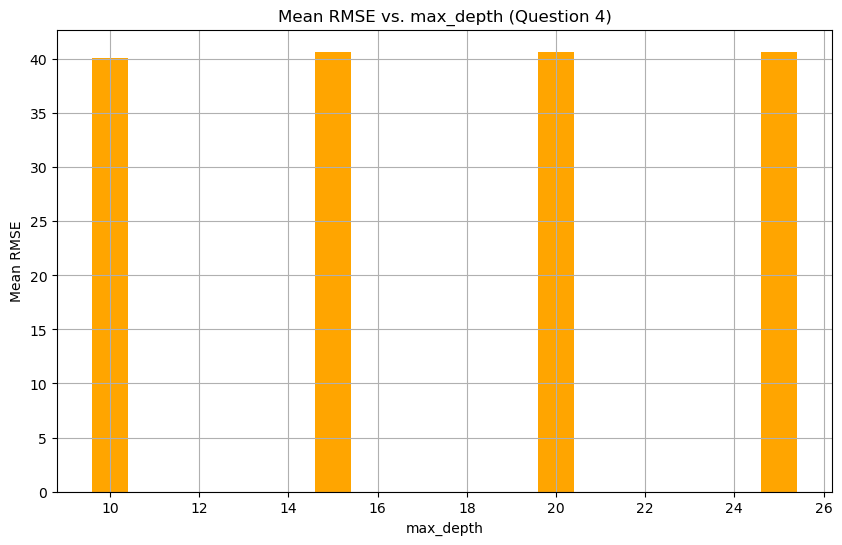

In [11]:
# Assuming `results` from Question 4 (Mean RMSE for each max_depth)
# Plot for Question 4: Mean RMSE vs. max_depth
max_depth_values = list(results.keys())
mean_rmse_values = list(results.values())

plt.figure(figsize=(10, 6))
plt.bar(max_depth_values, mean_rmse_values, color='orange')
plt.xlabel('max_depth')
plt.ylabel('Mean RMSE')
plt.title('Mean RMSE vs. max_depth (Question 4)')
plt.grid(True)
plt.show()


### Answer 4: 10

## Question 5

We can extract feature importance information from tree-based models.

At each step of the decision tree learning algorithm, it finds the best split. When doing it, we can calculate "gain" - the reduction in impurity before and after the split. This gain is quite useful in understanding what are the important features for tree-based models.

In Scikit-Learn, tree-based models contain this information in the feature_importances_ field.

For this homework question, we'll find the most important feature:

- Train the model with these parameters:
    - n_estimators=10,
    - max_depth=20,
    - random_state=1,
    - n_jobs=-1 (optional)
- Get the feature importance information from this model
  
What's the most important feature (among these 4)?
- study_hours_per_week
- attendance_rate
- distance_to_school
- teacher_quality


In [12]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd

# Train the RandomForestRegressor with the given parameters
rf = RandomForestRegressor(n_estimators=10, max_depth=20, random_state=1, n_jobs=-1)
rf.fit(X_train_sparse, y_train)

# Get feature importances
importances = rf.feature_importances_
features = dv.feature_names_

# Create a DataFrame to hold features and their importance scores
feature_importance_df = pd.DataFrame({
    'feature': features,
    'importance': importances
})

# Sort the features by importance
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

# Display the most important feature
print("Most important feature:", feature_importance_df.head(1)['feature'].values[0])


Most important feature: study_hours_per_week


### Answer 5: study_hours_per_week

## Question 6

Now let's train an XGBoost model! For this question, we'll tune the eta parameter:
- Install XGBoost
- Create DMatrix for train and validation
- Create a watchlist
- Train a model with these parameters for 100 rounds:
  
```
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

```
Now change eta from 0.3 to 0.1.

Which eta leads to the best RMSE score on the validation dataset?
- 0.3
- 0.1
- Both give equal value

In [13]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import numpy as np

# Prepare DMatrix for train and validation
dtrain = xgb.DMatrix(X_train_sparse, label=y_train)
dval = xgb.DMatrix(X_val_sparse, label=y_val)

# Define a watchlist to monitor validation performance during training
watchlist = [(dtrain, 'train'), (dval, 'validation')]

# Define common XGBoost parameters
xgb_params = {
    'max_depth': 6,
    'min_child_weight': 1,
    'objective': 'reg:squarederror',
    'nthread': 8,
    'seed': 1,
    'verbosity': 1
}

# Function to train the model with a given eta and return RMSE on validation set
def train_xgb(eta_value):
    xgb_params['eta'] = eta_value
    model = xgb.train(params=xgb_params, dtrain=dtrain, num_boost_round=100, evals=watchlist, verbose_eval=False)
    
    # Predict on validation set
    y_pred = model.predict(dval)
    
    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    return rmse

# Train models with eta=0.3 and eta=0.1
rmse_eta_0_3 = train_xgb(0.3)
rmse_eta_0_1 = train_xgb(0.1)

print(f"RMSE with eta=0.3: {rmse_eta_0_3:.3f}")
print(f"RMSE with eta=0.1: {rmse_eta_0_1:.3f}")

# Determine which eta value gives the best RMSE
if rmse_eta_0_3 < rmse_eta_0_1:
    print("Best eta is 0.3")
elif rmse_eta_0_1 < rmse_eta_0_3:
    print("Best eta is 0.1")
else:
    print("Both eta values give equal RMSE")


RMSE with eta=0.3: 43.343
RMSE with eta=0.1: 40.832
Best eta is 0.1


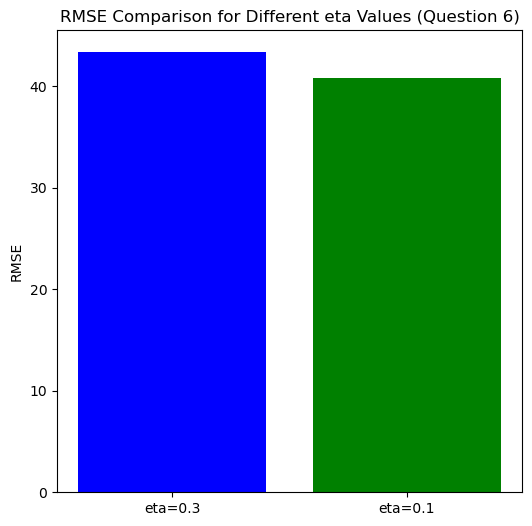

In [14]:
# Assuming `rmse_eta_0_3` and `rmse_eta_0_1` from Question 6
# Plot for Question 6: RMSE comparison for eta=0.3 and eta=0.1
eta_values = ['eta=0.3', 'eta=0.1']
rmse_values_eta = [rmse_eta_0_3, rmse_eta_0_1]

plt.figure(figsize=(6, 6))
plt.bar(eta_values, rmse_values_eta, color=['blue', 'green'])
plt.ylabel('RMSE')
plt.title('RMSE Comparison for Different eta Values (Question 6)')
plt.show()


### Answer 6: 0.1